In [1]:
#%matplotlib notebook
import numpy as np
import scipy as sp
import pandas
import matplotlib.pyplot as plt
import os

In [2]:
from astrobject import photometry
from astropy import units
from astrobject import baseobject

In [3]:
FILE_IN = "/home/nicolas/Work/Data/ztf/sci/2018/1006/408484/ztf_20181006408484_000695_zr_c12_o_q2_sciimg.fits"

sn_ra, sn_dec = 8.1570973, 41.31573905

In [4]:
sn_target = baseobject.get_target(name="SN_test", ra=sn_ra, dec=sn_dec)

In [5]:
ztfimg = photometry.Image(FILE_IN, background=0)

In [6]:
ztfimg.set_target(sn_target)

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/photometry.py:1513: RuntimeWarning: invalid value encountered in log10
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/utils/mpladdon.py:731: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


{'figure': <Figure size 432x360 with 1 Axes>,
 'ax': <matplotlib.axes._axes.Axes at 0x7fdc5a910890>,
 'imshow': <matplotlib.image.AxesImage at 0x7fdc5a77ff10>,
 'prop': {'interpolation': 'nearest',
  'origin': 'lower',
  'cmap': <matplotlib.colors.ListedColormap at 0x7fdcaba54e90>,
  'vmax': 2.32291550075625,
  'vmin': 2.0870462415915783},
 'target_plot': [<matplotlib.lines.Line2D at 0x7fdc5a78c650>]}

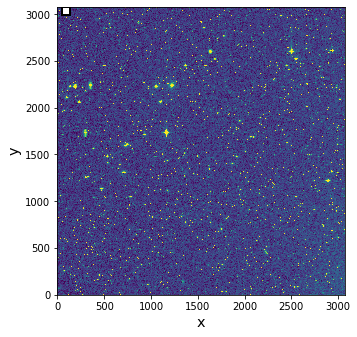

In [10]:
ztfimg.show()

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/photometry.py:1513: RuntimeWarning: invalid value encountered in log10
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/utils/mpladdon.py:731: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


{'figure': <Figure size 432x360 with 1 Axes>,
 'ax': <matplotlib.axes._axes.Axes at 0x7fdc5a8d9f90>,
 'imshow': <matplotlib.image.AxesImage at 0x7fdc5a8938d0>,
 'prop': {'interpolation': 'nearest',
  'origin': 'lower',
  'cmap': <matplotlib.colors.ListedColormap at 0x7fdcaba54e90>,
  'vmax': 2.32291550075625,
  'vmin': 2.0870462415915783},
 'target_plot': [<matplotlib.lines.Line2D at 0x7fdc5a893dd0>]}

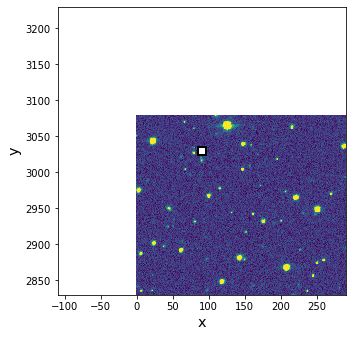

In [11]:
ztfimg.show(zoomon="target")

In [12]:
ztfimg.download_catalogue("gaia")

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/photometry.py:1513: RuntimeWarning: invalid value encountered in log10
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/utils/mpladdon.py:731: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


{'figure': <Figure size 432x360 with 1 Axes>,
 'ax': <matplotlib.axes._axes.Axes at 0x7fdc5a94ee50>,
 'imshow': <matplotlib.image.AxesImage at 0x7fdc39c17c90>,
 'prop': {'interpolation': 'nearest',
  'origin': 'lower',
  'cmap': <matplotlib.colors.ListedColormap at 0x7fdcaba54e90>,
  'vmax': 2.32291550075625,
  'vmin': 2.0870462415915783},
 'target_plot': [<matplotlib.lines.Line2D at 0x7fdc5a822790>]}

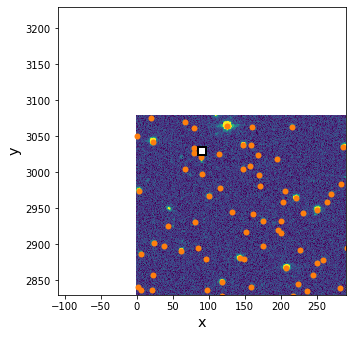

In [13]:
ztfimg.show(show_catalogue=True, zoomon="target")

In [14]:
ztfimg.catalogue.define_around(20*units.arcsec)

In [16]:
maskiso = ztfimg.catalogue.get_mask(catmag_range=[14,20], isolated_only=True)

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/catalogue/basecatalogue.py:541: RuntimeWarning: invalid value encountered in greater_equal
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/catalogue/basecatalogue.py:541: RuntimeWarning: invalid value encountered in less_equal


In [17]:
ra, dec, mag, color = ztfimg.catalogue.get(["ra", "dec", "mag", "BP-RP"],
                                          mask=maskiso)

In [18]:
x,y = ztfimg.coords_to_pixel(ra,dec).T

In [50]:
%matplotlib widget
plt.close()
ax = ztfimg.show()['ax']
ax.scatter(x,y, marker="x", color="C1")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/photometry.py:1513: RuntimeWarning: invalid value encountered in log10


In [21]:
plt.close()
fig = plt.figure(figsize = [8,5])
ax = fig.add_axes([0.12, 0.12, 0.8, 0.8])

ax.hist(mag,
        bins=60)

ax.set_xlabel('mag')
ax.set_ylabel('N')

plt.title('Catmag = ' + str([14, 20]) +', 20arcsec')

fig.savefig('../Images/mag-hist_14-20_20arcsec.pdf', bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
plt.close()
fig = plt.figure(figsize = [8,5])
ax = fig.add_axes([0.12, 0.12, 0.8, 0.8])

ax.hist(color,
        bins=60)

ax.set_xlabel('color')
ax.set_ylabel('N')

plt.title('Catmag = ' + str([14, 20]) +', 20arcsec')

fig.savefig('../Images/col-hist_14-20_20arcsec.pdf', bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
def get_patch(imgdata, x, y, dx, dy):
    data = imgdata.copy()
    data_crop = data[int(y-dy/2):int(y+dy/2)].T[int(x-dx/2):int(x+dx/2)].T
    return(data_crop)

In [26]:
prop={'interpolation': 'nearest',
  'origin': 'lower',
  'cmap': 'viridis'}

In [24]:
data_patch = get_patch(ztfimg.rawdata, x[12], y[12], 20, 20)

In [27]:
plt.close()
fig, ax = plt.subplots()
im = ax.imshow(data_patch, **prop)#, vmin=120, vmax=1500)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
from astropy.stats import sigma_clip

In [29]:
def get_border(data, e):
    bkgdimg = data.copy()
    bkgdimg.T[e:-e].T[e:-e] = np.NaN
    bkgd = np.mean(bkgdimg)
    bkgd = np.mean(sigma_clip(np.ravel(bkgdimg)))
    return bkgdimg, bkgd

In [30]:
data_bord, data_bkgd = get_border(data_patch, 5)

In [31]:
plt.close()
fig, ax = plt.subplots()
im = ax.imshow(data_bord, **prop)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
data_bkgd

133.83679682413737

In [33]:
np.shape(data_patch)[0]

20

In [34]:
np.asarray(np.shape(data_patch)).T

array([20, 20])

In [46]:
def inject_in_image(patch, imgdata, xpos, ypos):
    """imgdata = ztfimg.rawdata
    Goal is to take a xpos, ypos in pixel,
    and add a previously defined patch at this position
    
    Need to do a background substraction before adding
    the values of the patch around xpos, ypos"""
    dx, dy = np.shape(patch)[1], np.shape(patch)[0]
    patch_bkgd = get_border(patch, 5)[1]
    img_patched = imgdata.copy()
    xslice = slice(int(xpos-dx/2), int(xpos+dx/2))
    yslice = slice(int(ypos-dy/2), int(ypos+dy/2))
    img_patched.T[xslice].T[yslice] += patch - patch_bkgd
    return(img_patched)

In [47]:
ztf_patched = inject_in_image(data_patch, ztfimg.rawdata, x[12]+17, y[12]-10)

In [40]:
ztf_zoomed = get_patch(ztfimg.rawdata, x[12]+10, y[12], 30, 30)

plt.close()
fig, ax = plt.subplots()
im = ax.imshow(ztf_zoomed, **prop)#, vmin=120, vmax=1500)

In [48]:
ztf_patched_zoomed = get_patch(ztf_patched, x[12]+10, y[12], 30, 30)

plt.close()
fig, ax = plt.subplots()
im = ax.imshow(ztf_patched_zoomed, **prop)#, vmin=120, vmax=1500)

In [41]:
ztfimg.sep_extract(thresh=500, returnobjects=True)

In [42]:
ztfimg.sepobjects.data

id,flux,var,lbda,mjd,bandname,zp,zpsys
str27,float64,float64,object,object,object,object,str2
"2742.06056853,0.34316599",6846.314453125,nan,None,None,None,None,ab
"2064.23808477,3.10343438",13803.052734375,nan,None,None,None,None,ab
"273.06936504,3.53080307",319504.46875,nan,None,None,None,None,ab
"677.35425504,5.09819541",9449.314453125,nan,None,None,None,None,ab
"121.94580765,5.75241253",8822.0048828125,nan,None,None,None,None,ab
"2587.56263394,7.04958380",40988.8359375,nan,None,None,None,None,ab
"1520.18156209,8.40791529",3762.18310546875,nan,None,None,None,None,ab
"873.11564003,10.45169775",14081.541015625,nan,None,None,None,None,ab
"33.60146983,17.87984003",10801.283203125,nan,None,None,None,None,ab
